In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# Lecture de la base de données

# Construire le chemin d'accès au dataset
script_dir = os.path.abspath('')
relative_path = 'dataset/regularite-mensuelle-tgv-aqst.csv'
csv_path = os.path.join(script_dir, relative_path)

# Chargez le fichier CSV
data = pd.read_csv(csv_path, delimiter=";")
print(data.head())

      date   service         gare_depart         gare_arrivee  duree_moyenne  \
0  2018-01  National    BORDEAUX ST JEAN   PARIS MONTPARNASSE            141   
1  2018-01  National   LA ROCHELLE VILLE   PARIS MONTPARNASSE            165   
2  2018-01  National  PARIS MONTPARNASSE              QUIMPER            220   
3  2018-01  National  PARIS MONTPARNASSE              ST MALO            156   
4  2018-01  National  PARIS MONTPARNASSE  ST PIERRE DES CORPS             61   

   nb_train_prevu  nb_annulation  commentaire_annulation  \
0             870              5                     NaN   
1             222              0                     NaN   
2             248              1                     NaN   
3             102              0                     NaN   
4             391              2                     NaN   

   nb_train_depart_retard  retard_moyen_depart  ...  nb_train_retard_sup_15  \
0                     289            11.247809  ...                     110   


<h3><strong>Modèle de clustering K-Mean :</strong></h3><p>

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes numériques pertinentes
features_numeric = [
    "retard_moyen_depart", "retard_moyen_arrivee", 
    "retard_moyen_tous_trains_depart", "retard_moyen_tous_trains_arrivee", 
    "retard_moyen_trains_retard_sup15", "nb_train_retard_sup_15",
    "nb_train_retard_sup_30", "nb_train_retard_sup_60"
]

# Convertir les colonnes catégorielles en variables indicatrices
data_dummies = pd.get_dummies(data[['gare_depart', 'gare_arrivee', 'service']], drop_first=True)

# Combiner les variables indicatrices avec les caractéristiques numériques
X_combined = pd.concat([data[features_numeric], data_dummies], axis=1)

# Normaliser les données combinées
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

print(X_combined_scaled[:5])  # Afficher les premières lignes des données normalisées combinées


[[ 3.37156153e-03 -3.51187212e-01  1.13476264e-01  1.05693628e-01
  -1.27175551e+00  3.99849031e+00  2.88282136e+00  7.66030237e-01
  -9.03340323e-02 -9.03340323e-02 -9.03340323e-02 -9.03340323e-02
  -9.03340323e-02 -9.03340323e-02 -9.03340323e-02 -9.03340323e-02
   7.51149354e+00 -9.03340323e-02 -9.03340323e-02 -9.03340323e-02
  -9.03340323e-02 -9.03340323e-02 -9.03340323e-02 -9.03340323e-02
  -9.03340323e-02 -9.03340323e-02 -9.03340323e-02 -9.03340323e-02
  -9.03340323e-02 -9.03340323e-02 -9.03340323e-02 -1.57755754e-01
  -2.25929377e-01 -9.03340323e-02 -7.44942251e-02 -1.28276067e-01
  -2.19253231e-01 -9.03340323e-02 -1.28276067e-01 -9.03340323e-02
  -9.03340323e-02 -1.34080305e-01 -9.03340323e-02 -9.03340323e-02
  -2.25929377e-01 -5.03485163e-01 -3.85712720e-01 -1.82920956e-01
  -6.65927158e-02 -9.03340323e-02 -9.03340323e-02 -9.03340323e-02
  -9.03340323e-02 -1.34080305e-01 -9.03340323e-02 -9.03340323e-02
  -9.03340323e-02 -1.28276067e-01 -9.03340323e-02 -9.03340323e-02
  -9.03340

C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

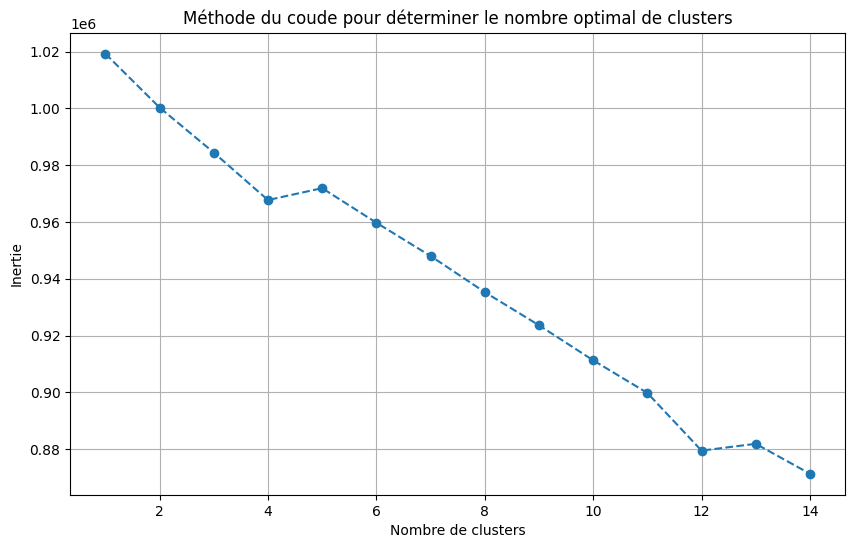

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculer les inerties pour différentes valeurs de k (nombre de clusters)
inertia = []
range_clusters = range(1, 15)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_combined_scaled)  # Utilisez X_combined_scaled au lieu de X_scaled
    inertia.append(kmeans.inertia_)

# Tracer la courbe de l'inertie
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.grid(True)
plt.show()


La méthode du coude consiste à représenter la variance expliquée en fonction du nombre de clusters, et à choisir le "coude" de la courbe comme indication du nombre optimal de clusters. Ce "coude" est le point où l'ajout de clusters supplémentaires n'apporte pas beaucoup plus d'information (c'est-à-dire que la variance expliquée ne diminue plus aussi rapidement).

D'après la courbe ci-dessus, il semble que le point du coude se situe autour de 3 ou 4 clusters. Cela suggère que 3 ou 4 serait un bon choix pour le nombre de clusters à utiliser dans le clustering K-means pour ces données.

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# 4. Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_combined_scaled)

# 5. Analyse des clusters
data["cluster"] = clusters
cause_summary = data.groupby("cluster")[["prct_cause_externe", "prct_cause_infra", "prct_cause_gestion_trafic", 
                                          "prct_cause_materiel_roulant", "prct_cause_gestion_gare", 
                                          "prct_cause_prise_en_charge_voyageurs"]].mean()
print(cause_summary)


C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         prct_cause_externe  prct_cause_infra  prct_cause_gestion_trafic  \
cluster                                                                    
0                 18.478770         15.690652                  19.029795   
1                 22.006480         22.621753                  19.289155   
2                 26.494753         21.378040                  18.585562   

         prct_cause_materiel_roulant  prct_cause_gestion_gare  \
cluster                                                         
0                          24.914891                10.299670   
1                          19.041665                 6.228597   
2                          18.001741                 7.132102   

         prct_cause_prise_en_charge_voyageurs  
cluster                                        
0                                    6.788242  
1                                    6.817779  
2                                    7.792654  


<strong>Analyse des clusters:</strong>

Nous avons trois clusters (0, 1, et 2).

Causes de Retard:

Les causes des retards sont réparties en six catégories: externe, infrastructure, gestion du trafic, matériel roulant, gestion en gare, et prise en charge des voyageurs.

Interprétation des Clusters:

- Cluster 0:
Le retard dû au matériel roulant est le plus élevé (~24.91%).
Les retards dus aux causes externes (~18.48%) et à la gestion du trafic (~19.03%) sont également notables.
Les retards dus à la prise en charge des voyageurs sont les plus faibles (~6.79%).
- Cluster 1:
Les retards dus aux causes externes (~22.01%) et à l'infrastructure (~22.62%) sont les plus élevés.
Les retards dus à la gestion en gare sont les plus faibles (~6.23%).
- Cluster 2:
Les retards dus aux causes externes (~26.49%) sont les plus élevés.
Les retards dus à la gestion en gare (~7.13%) et à la prise en charge des voyageurs (~7.79%) sont relativement faibles, mais légèrement plus élevés que dans les autres clusters.
Conclusion:

- Les trajets du Cluster 0 semblent être principalement affectés par des problèmes de matériel roulant.
- Les trajets du Cluster 1 ont des retards principalement dus à des causes externes et à des problèmes d'infrastructure.
- Les trajets du Cluster 2 sont fortement affectés par des causes externes, mais ils présentent également des retards notables dus à l'infrastructure et à la gestion du trafic.

En connaissant ces profils, nous pouvons cibler des interventions ou des améliorations spécifiques pour chaque groupe de trajets, en fonction des causes dominantes de retard.